In [7]:
# module importing
import pandas as pd
import random
import math
from IPython import display



In [8]:
#cvs file reading
world_file="coordinates.csv"
world_data=pd.read_csv(world_file)


Yemen
YE
48.0
15.0


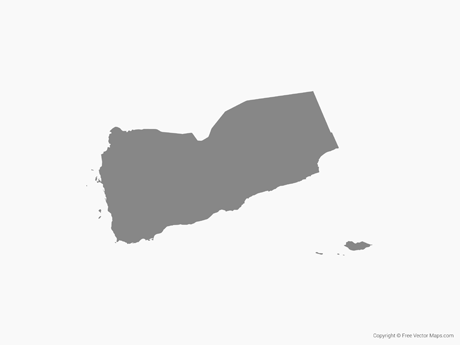

In [9]:
#data set
randnumber=random.randint(2,241)#choosing random country
global rand_country_name

rand_country_code=world_data.Code[randnumber]
rand_country_name=world_data.Name[randnumber]
rand_country_lat=world_data.Lat[randnumber]
rand_country_lon=world_data.Lon[randnumber]

#control point
print(rand_country_name)
print(rand_country_code)
print(rand_country_lon)
print(rand_country_lat)

#map vector
display.Image("https://fvmstatic.s3.amazonaws.com/maps/m/{}-EPS-01-0001.png".format(rand_country_code))


In [10]:
#defining function for distance between two countries
def Distance(guess):
    from math import sin,cos,acos
    
    global percent
    global distance_km
     
        
    target_lat=rand_country_lat
    target_lon=rand_country_lon
    target_lat_rad=target_lat/57.29577951
    target_lon_rad=target_lon/57.29577951
    
    #GUESS PART
    
    line=0
    global finding_line
    for i in world_data.Code:
        if i==guess:
            finding_line=line
        else:
            pass
        
        line+=1
        
    guess_lat=world_data.Lat[finding_line]
    guess_lon=world_data.Lon[finding_line]
    guess_lat_rad=guess_lat/57.29577951
    guess_lon_rad=guess_lon/57.29577951
    
    #distance formula
    distance_mile = 3963.0 * acos((sin(guess_lat_rad) * sin(target_lat_rad)) + cos(guess_lat_rad) * cos(target_lat_rad) * cos(target_lon_rad - guess_lon_rad))
    distance_km=distance_mile*1.609344
    
    percent=100-(distance_km/200)

    return distance_km,int(percent)
    

In [11]:
#defining function for direction help

def Direction(guess):
    target_lat=rand_country_lat
    target_lon=rand_country_lon
    
    global symbol

    
    #GUESS PART
    symbol=""
    
    line=0
    global finding_line
    for i in world_data.Code:
        if i==guess:
            finding_line=line
        else:
            pass
        
        line+=1
        
    guess_lat=world_data.Lat[finding_line]
    guess_lon=world_data.Lon[finding_line]
    
    #distance of coordinates between tho countries
    distance_lat=guess_lat-target_lat
    distance_lon=guess_lon-target_lon
    
    a=5 #location tolerance for direction
    
    if distance_lat>a and distance_lon<-a:
        symbol="⇘"
    elif distance_lat>a and (distance_lon<a and distance_lon>-a):
        symbol="⇓"
    elif distance_lat>a and distance_lon>a:
        symbol="⇙"
    elif distance_lat<a and distance_lat>-a and distance_lon>a:
        symbol="⇐"
    elif distance_lat<-a and distance_lon>a:
        symbol="⇖"
    elif distance_lat<-a and distance_lon<a and distance_lon>-a:
        symbol="⇑"
    elif distance_lat<-a and distance_lon<-a:
        symbol="⇗"
    elif distance_lat<a and distance_lat>-a and distance_lon<-3:
        symbol="⇒"
    else:
        pass
    
    return symbol


  



        

In [14]:
#UI
count=6  #attempt count
text=""
while count>0 or country_in=="Yes":
    
    
    country_in=input()
    
    if country_in==rand_country_code:
        print("Correct Well Done!")
        print("■ "*5+rand_country_name)
        break
        
        
    
   
    Distance(country_in)
    direction=Direction(country_in)
    square_count=int(percent)//20
    Template=country_in+": "+str(distance_km//1)+" "+square_count*"■ "+((5-square_count)*"□ "+str(percent//1))+" "+symbol
    
    count-=1

    text=text+" \n"+Template+" {} attempt remaining.".format(count)
    
    
    print(text)
    
    
    if (count==0):
        print("Correct answer:{}".format(rand_country_name))
    

    
    

    
    
    


    


TR
 
TR: 2958.0 ■ ■ ■ ■ □ 85.0 ⇘ 5 attempt remaining.
US
 
TR: 2958.0 ■ ■ ■ ■ □ 85.0 ⇘ 5 attempt remaining. 
US: 13096.0 ■ □ □ □ □ 34.0 ⇘ 4 attempt remaining.
ZM
 
TR: 2958.0 ■ ■ ■ ■ □ 85.0 ⇘ 5 attempt remaining. 
US: 13096.0 ■ □ □ □ □ 34.0 ⇘ 4 attempt remaining. 
ZM: 3882.0 ■ ■ ■ ■ □ 80.0 ⇗ 3 attempt remaining.
CD
 
TR: 2958.0 ■ ■ ■ ■ □ 85.0 ⇘ 5 attempt remaining. 
US: 13096.0 ■ □ □ □ □ 34.0 ⇘ 4 attempt remaining. 
ZM: 3882.0 ■ ■ ■ ■ □ 80.0 ⇗ 3 attempt remaining. 
CD: 3031.0 ■ ■ ■ ■ □ 84.0 ⇗ 2 attempt remaining.
YE
Correct Well Done!
■ ■ ■ ■ ■ Yemen


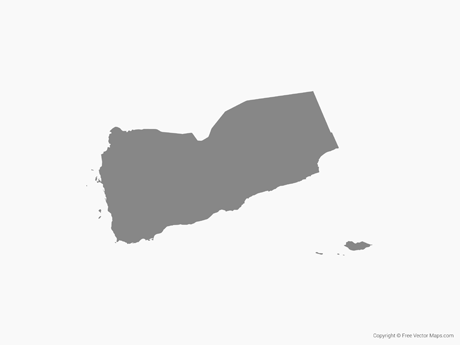

In [13]:
display.Image("https://fvmstatic.s3.amazonaws.com/maps/m/{}-EPS-01-0001.png".format(rand_country_code))
